In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data.head()
clinical_data.head()
# Combine the data into a single dataset

merge_data = pd.merge(mouse_data,clinical_data, on="Mouse ID")

# Display the data table for preview
merge_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merge_group = merge_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()


# Convert to DataFrame


time_df1 = pd.DataFrame(merge_group)

# Preview DataFrame
#time_df1 = time_df1.unstack(level=0)
time_df1.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = merge_data.groupby(['Drug','Timepoint']) ["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
time_df2 = standard_error.reset_index()
time_df2 = pd.DataFrame(time_df2)
# Preview DataFrame
# time_df2 = pd.DataFrame(standard_error) 
time_df2.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#time_df3 = pd.DataFrame(time_df1.unstack(level="Drug"))
#time_df3.reset_index()
time_df3 = time_df1.reset_index().pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
time_df3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


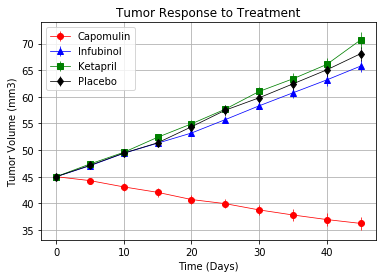

In [6]:
# Generate the Plot (with Error Bars)
x_time = time_df3.index
y_tim_cap = time_df3["Capomulin"].values
tim_sem_cap = time_df2.loc[time_df2['Drug']=='Capomulin',:]["Tumor Volume (mm3)"]
y_tim_inf = time_df3["Infubinol"].values
tim_sem_inf = time_df2.loc[time_df2['Drug']=='Infubinol',:]["Tumor Volume (mm3)"]
y_tim_ket = time_df3["Ketapril"].values
tim_sem_ket = time_df2.loc[time_df2['Drug']=='Ketapril',:]["Tumor Volume (mm3)"]
y_tim_plc = time_df3["Placebo"].values
tim_sem_plc = time_df2.loc[time_df2['Drug']=='Placebo',:]["Tumor Volume (mm3)"]
# plt.errorbar(x_axis,y_axis)
plt.errorbar(x_time,y_tim_cap,tim_sem_cap,marker="o",c="red",label="Capomulin",linewidth=0.75)
plt.errorbar(x_time,y_tim_inf,tim_sem_inf,marker="^",c="blue",label="Infubinol",linewidth=0.75)
plt.errorbar(x_time,y_tim_ket,tim_sem_ket,marker="s",c="green",label="Ketapril",linewidth=0.75)
plt.errorbar(x_time,y_tim_plc,tim_sem_plc,marker="d",c="black",label="Placebo",linewidth=0.75)



plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upperleft")

# Save the Figure

#plt.tight_layout()
#plt.savefig("images/Tumor_Response_to_Treatment.png",bbox_inches="tight")


In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
merge_group2 = merge_data.groupby(['Drug','Timepoint'])
meta_df1 = merge_group2["Metastatic Sites"].mean()
# Convert to DataFrame

meta_df1=pd.DataFrame(meta_df1)

# Preview DataFrame
meta_df1.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_df_drug = merge_data.groupby(['Drug','Timepoint'])["Metastatic Sites"].sem()
# Convert to DataFrame
meta_df2 = meta_df_drug.reset_index()
# Preview DataFrame
meta_df2 = pd.DataFrame(meta_df2)
meta_df2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
#meta_df3 = meta_df1.unstack(level=0)
meta_df3 = meta_df1.reset_index().pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
# Preview that Reformatting worked
meta_df3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


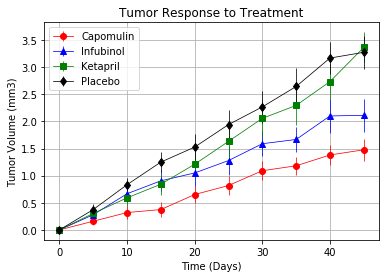

In [19]:
# Generate the Plot (with Error Bars)
x_meta = meta_df3.index

y_met_cap = meta_df3["Capomulin"].values
met_sem_cap = meta_df2.loc[meta_df2['Drug']=='Capomulin',:]["Metastatic Sites"]
y_met_inf = meta_df3["Infubinol"].values
met_sem_inf = meta_df2.loc[meta_df2['Drug']=='Infubinol',:]["Metastatic Sites"]
y_met_ket = meta_df3["Ketapril"].values
met_sem_ket = meta_df2.loc[meta_df2['Drug']=='Ketapril',:]["Metastatic Sites"]
y_met_plc = meta_df3["Placebo"].values
met_sem_plc = meta_df2.loc[meta_df2['Drug']=='Placebo',:]["Metastatic Sites"]
# plt.errorbar(x_axis,y_axis)
plt.errorbar(x_meta,y_met_cap,met_sem_cap,marker="o",c="red",label="Capomulin",linewidth=0.75)
plt.errorbar(x_meta,y_met_inf,met_sem_inf,marker="^",c="blue",label="Infubinol",linewidth=0.75)
plt.errorbar(x_meta,y_met_ket,met_sem_ket,marker="s",c="green",label="Ketapril",linewidth=0.75)
plt.errorbar(x_meta,y_met_plc,met_sem_plc,marker="d",c="black",label="Placebo",linewidth=0.75)

plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upperleft")

# Save the Figure

# Show the Figure


## Survival Rates

In [29]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
merge_data_new = pd.merge(mouse_data,clinical_data)
merge_group3 = merge_data_new.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
merge_group3
sur_df1 = merge_group3.reset_index()
# Preview DataFrame
sur_df1.columns = ["Drug","Timepoint","Mouse Count"]
sur_df1.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [35]:
# Minor Data Munging to Re-Format the Data Frames
sur_df2 = sur_df1.reset_index().pivot(index="Timepoint",columns="Drug",values="Mouse Count")
# Preview the Data Frame
pd.DataFrame(sur_df2).head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


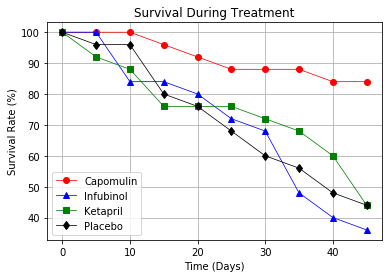

In [44]:
# Generate the Plot (Accounting for percentages)
x_sur = sur_df2.index
y_sur_cap = sur_df2["Capomulin"]/25*100
y_sur_inf = sur_df2["Infubinol"]/25*100
y_sur_ket = sur_df2["Ketapril"]/25*100
y_sur_pla = sur_df2["Placebo"]/25*100

plt.plot(x_sur,y_sur_cap,marker="o",color="red",label="Capomulin",linewidth=0.75)
plt.plot(x_sur,y_sur_inf,marker="^",color="blue",label="Infubinol",linewidth=0.75)
plt.plot(x_sur,y_sur_ket,marker="s",color="green",label="Ketapril",linewidth=0.75)
plt.plot(x_sur,y_sur_pla,marker="d",color="black",label="Placebo",linewidth=0.75)

plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lowerleft")
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()